<a href="https://colab.research.google.com/github/ahsansaleem/id_codes/blob/main/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv(r'C:\Users\Ahsan\bdsf\housing_prices_assignment.csv')
df = pd.read_csv('/content/drive/MyDrive/Thesis/datasets/housing_prices_assignment.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_cleaned1 = df.dropna(axis=1)
#df_cleaned1 = df_cleaned1.dropna()

#64 columns left after we dropped all columns with missing data

#Removing outliers using quantiles
outliers_low = df["SalePrice"].quantile(0.01)
outliers_high  = df["SalePrice"].quantile(0.99)

df_cleaned1 = df_cleaned1[(df_cleaned1["SalePrice"] < outliers_high) & (df_cleaned1["SalePrice"] > outliers_low)]
df_cleaned1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1430 non-null   int64 
 1   MSSubClass     1430 non-null   int64 
 2   MSZoning       1430 non-null   object
 3   LotArea        1430 non-null   int64 
 4   Street         1430 non-null   object
 5   LotShape       1430 non-null   object
 6   LandContour    1430 non-null   object
 7   Utilities      1430 non-null   object
 8   LotConfig      1430 non-null   object
 9   LandSlope      1430 non-null   object
 10  Neighborhood   1430 non-null   object
 11  Condition1     1430 non-null   object
 12  Condition2     1430 non-null   object
 13  BldgType       1430 non-null   object
 14  HouseStyle     1430 non-null   object
 15  OverallQual    1430 non-null   int64 
 16  OverallCond    1430 non-null   int64 
 17  YearBuilt      1430 non-null   int64 
 18  YearRemodAdd   1430 non-null

In [ ]:
#lets use the top 4 most positively correlated and negatively correlated numeric values to predict the sales price using regression
feature_names = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenAbvGr', 'EnclosedPorch', 'MSSubClass' , 'OverallCond']
X = df_cleaned1[feature_names]
y = np.log(df_cleaned1.SalePrice)
# we log transform our predictions because the saleprice data distribution is skewed


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#import the required library
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor() #define model

model.fit(X_train, y_train) #fit the model to the data (AKA TRAINING)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train))) #accuracy on training data
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #accuracy on test data

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.78


In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

actual_values = y_test.tolist()
model_predict = model.predict(X_test)




R^2 is: 
 0.7778288439274965


In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(actual_values, model_predict))

RMSE is: 
 0.02623699574782341


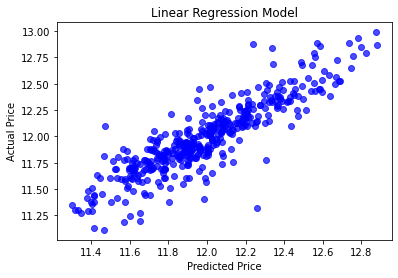

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(model_predict, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [ ]:

for cn in range(0,len(actual_values)):
    print ("Original : %s Predicted: %s - Difference : %s" % (np.exp(actual_values[cn]), np.exp(model_predict[cn]),np.exp(actual_values[cn])- np.exp(model_predict[cn]) ))


Original : 180999.99999999985 Predicted: 183384.17893571148 - Difference : -2384.1789357116213
Original : 124999.99999999991 Predicted: 115064.08801876596 - Difference : 9935.911981233949
Original : 249999.99999999983 Predicted: 284612.3562863881 - Difference : -34612.3562863883
Original : 139999.9999999999 Predicted: 124856.17021414854 - Difference : 15143.829785851369
Original : 159999.9999999999 Predicted: 151177.48981638133 - Difference : 8822.510183618579
Original : 86999.99999999997 Predicted: 133330.09345285094 - Difference : -46330.09345285097
Original : 102000.00000000003 Predicted: 127504.13825743868 - Difference : -25504.13825743865
Original : 188000.00000000012 Predicted: 195026.25508971035 - Difference : -7026.255089710234
Original : 129499.99999999991 Predicted: 106008.30196743624 - Difference : 23491.69803256367
Original : 185000.00000000006 Predicted: 182054.78885452318 - Difference : 2945.2111454768747
Original : 228949.99999999997 Predicted: 154371.72340242405 - Diffe